# TAREA 1: Métodos de aprendizaje conjunto.

NOMBRES:

Santiago Gómez Arias

Miguel Castro

Juan Carlos Castillo

## 1. Preguntas conceptuales

### 1.1. ¿Si un algoritmo `gradient boosting ensemble` muestra `sobreajuste`, ¿debería aumentar o disminuir la tasa de aprendizaje? Argumente su respuesta.

**Respuesta: Se debería bajar la tasa de aprendizaje, ya que una tasa de aprendizaje más baja reduce la velocidad con la que el modelo se ajusta a los datos de entrenamiento**

### 1.2. Si ha entrenado 5 `modelos diferentes` de clasificación con exactamente los mismos datos de entrenamiento y todos ellos alcanzan una exactitud (`accuracy`) del $95\%$, ¿existe alguna posibilidad de que pueda combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?

**Respuesta: Sí es posible, ya que estadísticamente es más probable obtener una elección correcta al usar varios votantes que solo uno.**

### 1.3. Suponga que en el escenario de la pregunta `1.2` se combinan los `5` clasificadores base mediante el método de `voto mayoritario duro`. Calcule el error del clasificador conjunto.

 Como el accuracy de los clasificadores es del 95%, los errores son del 5%. Luego como usaremos el voto mayoritario duro y tenemos 5 clasificadores, aquí obtendremos un error cuando obtengamos un error en tres o más casos. Por lo que la probabilidad de equivocarse sería

 $ E = \displaystyle\sum_{k=3}^5 \binom{5}{k}0.05^k(1-0.05)^{5-k}$

In [ ]:
# Calculamos la probabilidad de error del ensemble
import scipy.stats as stats
error_ensemble = sum(stats.binom.pmf(k, 5, 0.05) for k in range(3, 5 + 1))
print(round(error_ensemble,5)*100,"%")

0.116 %


**Respuesta: El error es de 0.116%**

### 1.4. ¿Si un algoritmo `Adaboost` muestra `subajuste`, ¿qué hiperparámetros debería ajustar y cómo? Argumente su respuesta.

Los hiperparámetros relacionados con el Adaboost son el estimador, la tasa de aprendizaje y el número de estimadores.  Sin embargo, el estimador no participa directamente en que tanto un modelo aprende de sus datos de entrenamiento. En este caso los parámetros que se deberían ajustar con la tasa de aprendizaje y el número de estimadores. La tasa de aprendizaje se debe incrementar para que los pasos con el que se cambian los parámetros del modelos no sean tan pequeños y aprenda un poco más rápido; y el número de estimadores también debe incrementarse para que haya una mayor de cantidad de pasos para que se ajuste más a los datos. En otra palabras estaríamos graduando el número de pasos y la longitud de esos pasos para llegar al ajuste deseado.

## 2. Ejercicio(s) práctico(s)

El conjunto de datos `mnist_784`, contiene 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE.UU. Es posible acceder a este dataset medinte las siguientes instrucciones:

In [ ]:
%%time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

pd.DataFrame(X)


CPU times: total: 3.95 s
Wall time: 9.42 s


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La etiqueta de esta imagen es:  3


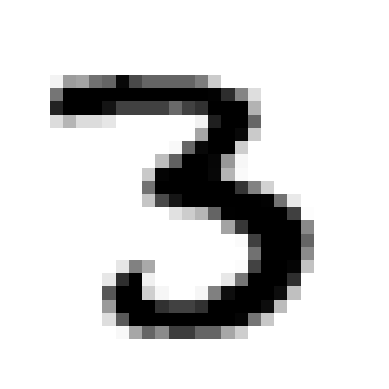

In [ ]:
##Visualización
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

print("La etiqueta de esta imagen es: ", y[12])
plot_digit(X[12])

NMF (Non-negative Matrix Factorization) se aplica a matrices de datos que contienen solo `valores no negativos`.

De manera similar a `PCA`, podemos realizar una `reducción dimensional` y obtener una entrada dimensional reducida utilizando `NMF`. Notamos que obtenemos imágenes un poco `menos ruidosas` en comparación con el resultado de PCA.

In [ ]:
from sklearn.decomposition import PCA, NMF

def reducedInputPCA(X:   pd.DataFrame,
                    nPC: int
                    ):
    pca = PCA(n_components = nPC)        ## instanciando
    X_pca = pca.fit_transform(X)         ## "entrenando"
    return pca.inverse_transform(X_pca)


def reducedInputNMF(X,n):
    nmf = NMF(n_components = n, init='random', random_state=0)      #
    X_nmf = nmf.fit_transform(X)                                  #
    return nmf.inverse_transform(X_nmf)

- 2.1 Escale todas las `784` variables con el método `min-max`; pero usando en máximo y el mínimo globales, en lugar de los de cada columna. Vrase el `ejercicio 0312` del capítulo 5, unidad 8 (`ensemble algorithms`).

In [ ]:
X_min = X.min()
X_max = X.max()
X_range = X_max - X_min
X = (X - X_min)/X_range

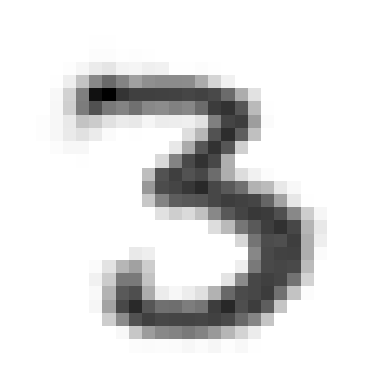

In [ ]:
#X_reduced_1 = reducedInputNMF(X,195)
#plot_digit(X_reduced_1[12])

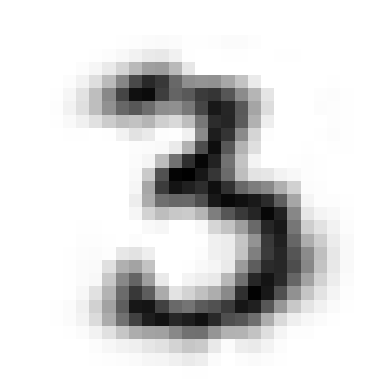

In [ ]:
X_reduced_2 = reducedInputNMF(X,48)
plot_digit(X_reduced_2[12])

- 2.2 Divida los datos en un conjunto de entrenamiento y un conjunto de prueba (utilizar $60.000$ registros para el entrenamiento y $10.000$ para prueba). Luego, entrene los siguientes clasificadores optimizando los `hiperparámetros` más representativos (excepto los de regularización) mediante la `validación cruzada `:

  - clasificador SVM.
  - Regresión logística
  - Naive Bayes
  - K-vecinos
  - Árbol de decisión

  Compare los rendimientos de cada uno de ellos.

Respuesta: Dividiendo los datos en entrenamiento y test

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 1/7, random_state=1234)

In [ ]:
#X_reduced_1_train, X_reduced_1_test, Y_reduced_1_train, Y_reduced_1_test = train_test_split(X_reduced_1, y, test_size = 1/7, random_state=1234)
X_reduced_2_train, X_reduced_2_test, Y_reduced_2_train, Y_reduced_2_test = train_test_split(X_reduced_2, y, test_size = 1/7, random_state=1234)

Creando modelo 1: Regresión logística

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression     #se importa cada clasificador individual

penalty = [None]#['l1', 'l2']
max_iter = [50, 100, 200]
#No se usa aquí parámetro de regularización C
parameters_lr = {'penalty': penalty, 'max_iter': max_iter}


gridCV_lr = GridSearchCV( LogisticRegression(random_state = 12345), parameters_lr, n_jobs = -1)
gridCV_lr.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_penalty = gridCV_lr.best_params_['penalty']
best_max_iter  = gridCV_lr.best_params_['max_iter']


print("El mejor penalty es: " + str(best_penalty))
print("El mejor número de máximas iteraciones es: " + str(best_max_iter))

El mejor penalty es: None
El mejor número de máximas iteraciones es: 100
CPU times: total: 2min
Wall time: 1min 14s


In [ ]:
LR_best = LogisticRegression(penalty=best_penalty, max_iter=best_max_iter, random_state = 12345)

LR_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_lr = LR_best.predict(X_reduced_2_test)
print( "El mejor accuracy del LR : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_lr),3)))

El mejor accuracy del LR : 0.901


Creando modelo 2: Naive bayes

In [ ]:
%%time
from sklearn.naive_bayes  import GaussianNB
var_smoothing= [1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10]
parameters_nb = {'var_smoothing': var_smoothing}


gridCV_nb = GridSearchCV(GaussianNB(), parameters_nb, n_jobs = -1)
gridCV_nb.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_var_smoothing = gridCV_nb.best_params_['var_smoothing']

print("El mejor var_smoothing es: " + str(best_var_smoothing))

El mejor var_smoothing es: 0.1
CPU times: total: 1.33 s
Wall time: 27.9 s


In [ ]:
NB_best = GaussianNB(var_smoothing=best_var_smoothing)

NB_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_nb = NB_best.predict(X_reduced_2_test)
print( "El mejor accuracy del NB : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_nb),3)))

El mejor accuracy del NB : 0.803


Creando modelo 3: K-vecinos

In [ ]:
%%time
from sklearn.neighbors    import KNeighborsClassifier   #se importa cada clasificador individual
n_neighbors = [3, 5, 7]# Mejor número impar [3, 5, 7, 9]
p = [2]#[1, 2, 3]
weights = ['uniform', 'distance']#
parameters_knn = {'n_neighbors': n_neighbors, 'p': p, 'weights': weights}


gridCV_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, n_jobs = -1)
gridCV_knn.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_n_neighbors = gridCV_knn.best_params_['n_neighbors']
best_p = gridCV_knn.best_params_['p']
best_weights  = gridCV_knn.best_params_['weights']


print("El mejor n_neighbors es: " + str(best_n_neighbors))
print("El mejor p es: " + str(best_p))
print("El mejor weights es: " + str(best_weights))

El mejor n_neighbors es: 5
El mejor p es: 2
El mejor weights es: distance
CPU times: total: 547 ms
Wall time: 1min 27s


In [ ]:
KNN_best = KNeighborsClassifier(n_neighbors=best_n_neighbors, p=best_p, weights=best_weights)

KNN_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_knn = KNN_best.predict(X_reduced_2_test)
print( "El mejor accuracy del KNN : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_knn),3)))

El mejor accuracy del KNN : 0.975


Creando modelo 4: Decision Tree

In [ ]:
%%time
from sklearn.tree import  DecisionTreeClassifier
depth_grid = np.arange(1,22,5)
min_samples_leaf_grid = np.arange(2,23,5) #
max_leaf_nodes_grid = np.arange(23,54,5)#
parameters_dt = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}


gridCV_dt = GridSearchCV(DecisionTreeClassifier(random_state = 12345), parameters_dt, n_jobs = -1)
gridCV_dt.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_depth = gridCV_dt.best_params_['max_depth']
best_min_samples_leaf = gridCV_dt.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV_dt.best_params_['max_leaf_nodes']


print("La mejor max_depth del árbol: " + str(best_depth))
print("El mejor min_samples_leaf del árbol: " + str(best_min_samples_leaf))
print("El mejor max_leaf_nodes del árbol: " + str(best_max_leaf_nodes))

La mejor max_depth del árbol: 11
El mejor min_samples_leaf del árbol: 2
El mejor max_leaf_nodes del árbol: 53
CPU times: total: 37.9 s
Wall time: 28min 34s


In [ ]:
DT_best = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345)

DT_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_dt = DT_best.predict(X_reduced_2_test)
print( "La mejor accuracy del árbol : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_dt),3)))

La mejor accuracy del árbol : 0.786


Creando modelo 5: SVM

In [ ]:
%%time
from sklearn.svm  import SVC

degree = [2,3]#
kernel =  ['rbf','poly']#
#No se usa aquí parámetro de regularización C
parameters_svm = {'degree': degree, 'kernel': kernel}


gridCV_svm = GridSearchCV(SVC(gamma='scale', random_state = 12345), parameters_svm, n_jobs = -1)
gridCV_svm.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_degree = gridCV_svm.best_params_['degree']
best_kernel  = gridCV_svm.best_params_['kernel']


print("El mejor degree es: " + str(best_degree))
print("El mejor kernel es: " + str(best_kernel))

El mejor degree es: 2
El mejor kernel es: rbf
CPU times: total: 1min 57s
Wall time: 27min 56s


In [ ]:
SVM_best = SVC(degree=best_degree, kernel=best_kernel, gamma='scale', probability= True,  random_state = 12345)# gamma = 'auto',

SVM_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_svm = SVM_best.predict(X_reduced_2_test)
print( "El mejor accuracy del SVM : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_svm),3)))

El mejor accuracy del SVM : 0.974


- 2.3 Utilizando la combinación de hiperparámetroas más óptima para cada uno de los modelos anteriores, construya un clasificador por `voto mayoritario` tanto tipo `hard` como tipo `soft`. Elejia el más `eficiente` de los dos métodos y compare su rendimientro contra el mejor clasificador undividual del numeral anterior.

In [ ]:
%%time
from sklearn.ensemble import VotingClassifier             # Se importa clasificador por votación

myVotingEnsemble_hard=VotingClassifier(estimators=[('SVM',SVM_best), ('LR',LR_best), ('nb',NB_best), ('knn',KNN_best),  ('dt',DT_best)],voting='hard', verbose = True, n_jobs = -1)
myVotingEnsemble_hard.fit(X_reduced_2_train, Y_reduced_2_train)
print(metrics.classification_report(Y_reduced_2_test, myVotingEnsemble_hard.predict(X_reduced_2_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       948
           1       0.96      0.99      0.97      1147
           2       0.95      0.95      0.95      1026
           3       0.93      0.93      0.93      1009
           4       0.95      0.96      0.96       991
           5       0.95      0.92      0.93       914
           6       0.96      0.97      0.96       967
           7       0.95      0.95      0.95      1037
           8       0.97      0.92      0.94       966
           9       0.94      0.92      0.93       995

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

CPU times: total: 1min 14s
Wall time: 11min 41s


In [ ]:
%%time
from sklearn.ensemble import VotingClassifier             # Se importa clasificador por votación

myVotingEnsemble_soft=VotingClassifier(estimators=[('SVM',SVM_best), ('LR',LR_best), ('nb',NB_best), ('knn',KNN_best),  ('dt',DT_best)],voting='soft', verbose = True, n_jobs = -1)
myVotingEnsemble_soft.fit(X_reduced_2_train, Y_reduced_2_train)
print(metrics.classification_report(Y_reduced_2_test, myVotingEnsemble_soft.predict(X_reduced_2_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       948
           1       0.96      0.99      0.97      1147
           2       0.96      0.94      0.95      1026
           3       0.95      0.94      0.94      1009
           4       0.97      0.96      0.96       991
           5       0.96      0.93      0.95       914
           6       0.95      0.98      0.96       967
           7       0.95      0.96      0.96      1037
           8       0.96      0.95      0.96       966
           9       0.92      0.94      0.93       995

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

CPU times: total: 1min 13s
Wall time: 11min 34s


El método de votación mejor es el suave "soft"

- 2.4 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `Bagging`. Compare su rendimiento con los modelos anteriores.

In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier

n_estimators_bag= [5, 10, 50]#
parameters_bagging = {'n_estimators': n_estimators_bag}

gridCV_bagging= GridSearchCV(BaggingClassifier(KNN_best), parameters_bagging, n_jobs = -1)
gridCV_bagging.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_n_estimators_bag = gridCV_bagging.best_params_['n_estimators']


print("El mejor n_estimators es: " + str(best_n_estimators_bag))

El mejor n_estimators es: 5
CPU times: total: 2.61 s
Wall time: 22min 16s


In [ ]:
bagging_best = BaggingClassifier(KNN_best, n_estimators=best_n_estimators_bag,  n_jobs=-1)

bagging_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_bagging = bagging_best.predict(X_reduced_2_test)
print( "El mejor accuracy del bagging : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_bagging ),3)))

El mejor accuracy del bagging : 0.974


- 2.5 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `bosque aleatorio` y utilice la validación cruzada afinar solamente un hiperparámetro: `n_estimators`. Compare su rendimiento con los modelos anteriores.

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

n_estimators_rfc= [10, 50, 100, 500]#
parameters_rfc = {'n_estimators': n_estimators_rfc}

gridCV_rfc= GridSearchCV(RandomForestClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345, class_weight = "balanced"), parameters_rfc, n_jobs = -1)
gridCV_rfc.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_n_estimators_rfc = gridCV_rfc.best_params_['n_estimators']


print("El mejor n_estimators es: " + str(best_n_estimators_rfc))

El mejor n_estimators es: 500
CPU times: total: 5min 57s
Wall time: 11min 22s


In [ ]:
%%time
# Clasificación por Random Forest.
RFC_best = RandomForestClassifier(n_estimators=best_n_estimators_rfc , max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345, class_weight = "balanced")
RFC_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_rfc = RFC_best.predict(X_reduced_2_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_rfc),3)))

Random Forest accuracy : 0.893
CPU times: total: 5min 57s
Wall time: 5min 57s


- 2.6 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `AdaBoost`y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier

n_estimators_ab= [10, 20]#, 50, 100
learning_rate_ab= [1, 1e-1]#

parameters_adaboost = {'n_estimators': n_estimators_ab, 'learning_rate':learning_rate_ab}

gridCV_ab = GridSearchCV(AdaBoostClassifier(LR_best,random_state=123), parameters_adaboost , n_jobs = -1)
gridCV_ab.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_n_estimators_ab = gridCV_ab.best_params_['n_estimators']
best_learning_rate_ab = gridCV_ab.best_params_['learning_rate']


print("El mejor n_estimators es: " + str(best_n_estimators_ab))
print("El mejor learning_rate es: " + str(best_learning_rate_ab))

El mejor n_estimators es: 10
El mejor learning_rate es: 0.1
CPU times: total: 20min 19s
Wall time: 17min 8s


In [ ]:
%%time
# Clasificación por adaboost.
AdaBoost_best = AdaBoostClassifier(LR_best, random_state=123, n_estimators=best_n_estimators_ab, learning_rate=best_learning_rate_ab)
AdaBoost_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_ada = AdaBoost_best.predict(X_reduced_2_test)
print( "Adaboost accuracy : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_ada),3)))

Adaboost accuracy : 0.881
CPU times: total: 20min 27s
Wall time: 1min 31s


- 2.7 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `GradientBoostingClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_gbc= [10]#, 50, 100
learning_rate_gbc= [1]#, 1e-1
parameters_gbc = {'n_estimators': n_estimators_gbc, 'learning_rate':learning_rate_gbc}

gridCV_gbc= GridSearchCV(GradientBoostingClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345), parameters_gbc, n_jobs = -1)
gridCV_gbc.fit(X_reduced_2_train, Y_reduced_2_train)
#-----------
best_n_estimators_gbc = gridCV_gbc.best_params_['n_estimators']
best_learning_rate_gbc = gridCV_gbc.best_params_['learning_rate']


print("El mejor n_estimators es: " + str(best_n_estimators_gbc))
print("El mejor learning rate es: " + str(best_learning_rate_gbc))

NameError: name 'X_reduced_1_train' is not defined

In [ ]:
%%time
# Clasificación por Gradient Boosting.
GBC_best = GradientBoostingClassifier(n_estimators=best_n_estimators_gbc, learning_rate=best_learning_rate_gbc, max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345)
GBC_best.fit(X_reduced_2_train, Y_reduced_2_train)
Y_pred_gbc = GBC_best.predict(X_reduced_2_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test,Y_pred_gbc),3)))

- 2.8 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `XGBClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

In [ ]:
%%time
from xgboost import XGBClassifier

n_estimators_XGBC= [10, 20, 50]
learning_rate_XGBC= [1, 1e-1]
parameters_XGBC = {'n_estimators': n_estimators_XGBC, 'learning_rate':learning_rate_XGBC}

Y_reduced_2_train_int = Y_reduced_2_train.astype(int)

gridCV_XGBC= GridSearchCV(XGBClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345), parameters_XGBC, n_jobs = -1)
gridCV_XGBC.fit(X_reduced_2_train, Y_reduced_2_train_int)
#-----------
best_n_estimators_XGBC = gridCV_XGBC.best_params_['n_estimators']
best_learning_rate_XGBC = gridCV_XGBC.best_params_['learning_rate']


print("El mejor n_estimators es: " + str(best_n_estimators_XGBC))
print("El mejor learning rate es: " + str(best_learning_rate_XGBC))

El mejor n_estimators es: 50
El mejor learning rate es: 1
CPU times: total: 18min 16s
Wall time: 43min 32s


In [ ]:
%%time
# Clasificación por XGB.
XGBC_best = XGBClassifier(n_estimators=best_n_estimators_XGBC, learning_rate=best_learning_rate_XGBC, max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes, random_state = 12345)
XGBC_best.fit(X_reduced_2_train, Y_reduced_2_train_int)
Y_pred_XGBC = XGBC_best.predict(X_reduced_2_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_reduced_2_test.astype(int),Y_pred_XGBC),3)))

XGBoost accuracy : 0.967
CPU times: total: 17min 48s
Wall time: 1min 14s


- 2.9 Elija `el mejor clasificador` de entre todos los entrenados previamente y argumente su respuesta.

Al evaluar varios de los métodos que se usaron aquí utilizando los datos en distintas formas: por ejemplo en su forma pura (784 features), reducido 4 veces (196 features) y reducido 16 veces (49 features), los tiempos de ejecución y la precisión que se tuvo para cada uno fue muy variada, demórandose el ajuste desde un pocos segundos hasta llegar a decenas de minutos o incluso a veces cientos de minutos. Por ejemplo el clasificador con gradient boosting se demoró demasiado y fue el único método que no se alcanzó a comparar debido a su enorme tiempo de ejecución en el entrenamiento. Con todo esto en cuenta el mejor clasificador para este ejercicio fue el KNN ya que obtuvo un accuracy bastante bueno (97,5%) incluso para los datos reducidos 16 veces, además de que se pudo entrenar en un tiempo bastante corto.

Es muy probable que con modelos de votación más complejos, votación, bagging o boosting, se puedan obtener mejores accuracy con los hiperparámetros correctos, ya que aquí por cuestión de tiempo no se pudo probar muchos distintos hiperparámetros usando el GridSearchCV, y aún así se consiguieron buenos accuracy. Pero para este problema en específico el accuracy del clasificador KNN está tan cerca al 100% y es tan rápido, que lo elijo para este problema como el mejor clasificador por su practicidad.